##### HRISHIT GUPTA (22152)
 
##### BRAIN TUMOR DETECTION 

The dataset used in this project can be downloaded from this link : 

https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

In [4]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Sample label data
label = np.array([[0], [1]])  # Each value is in its own row

# Initialize OneHotEncoder (without 'sparse' argument)
encoder = OneHotEncoder()

# Fit the encoder and transform the label data (returns a sparse matrix by default)
one_hot_encoded_sparse = encoder.fit_transform(label)


one_hot_encoded = one_hot_encoded_sparse.toarray()

# Display the result
print(one_hot_encoded)


[[1. 0.]
 [0. 1.]]


In [6]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'dataset\\yes'):
    for file in f:
        if '.JPG' or '.jpg' or 'Y' or '.png' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [7]:

paths = []
for r, d, f in os.walk(r"dataset\\no"):
    for file in f:
        if '.JPG' or '.jpg' or 'jpeg' or 'no' or 'No' or '.png' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [8]:
data = np.array(data)
data.shape

(217, 128, 128, 3)

In [9]:
print(f'Total number of images we have: {len(data)}')

Total number of images we have: 217


In [10]:
result = np.array(result)
n= len(data)
result = result.reshape(n,2)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.20, shuffle=True, random_state=42)
print(f'Number of images in training data: {len(x_train)}')
print(f'Number of images in testing data: {len(x_test)}')

Number of images in training data: 173
Number of images in testing data: 44


In [24]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(3,3),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size = (3,3), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (3,3), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())


model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,260,450 (16.25 MB)

 Trainable params: 4,260,258 (16.25 MB)

 Non-trainable params: 192 (768.00 B)

None


In [25]:
y_train.shape

(173, 2)

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,  # your training data
    epochs=30,         # start with 50 epochs
    batch_size=32,     # start with batch size 32
    validation_data=(x_test, y_test),  # your validation data
    #callbacks=[early_stopping],  # include early stopping callback
    verbose=1  # set to 0 for no output, 1 for progress bar
)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5415 - loss: 8.5575 - val_accuracy: 0.6591 - val_loss: 4.2292
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6609 - loss: 4.4707 - val_accuracy: 0.6818 - val_loss: 11.2953
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7815 - loss: 3.6077 - val_accuracy: 0.6591 - val_loss: 4.7328
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7717 - loss: 0.8098 - val_accuracy: 0.6591 - val_loss: 3.1031
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8687 - loss: 0.3613 - val_accuracy: 0.6818 - val_loss: 2.9943
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8532 - loss: 0.4109 - val_accuracy: 0.7045 - val_loss: 1.9364
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8173 - loss: 0.5215 - val_accuracy: 0.7500 - val_loss: 1.2210
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8498 - loss: 0.3239 - val_accuracy: 0.7273 - val_loss: 1.1727
Epoch 9/30
6/6

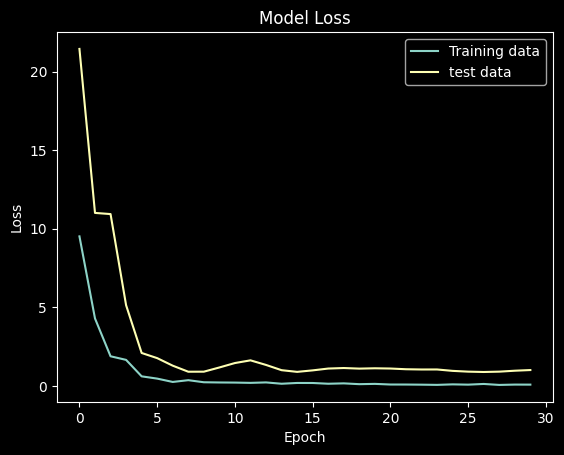

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'test data'], loc='upper right')
plt.show()

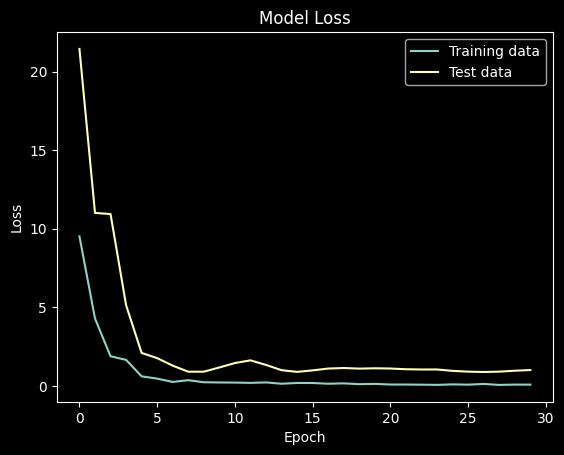

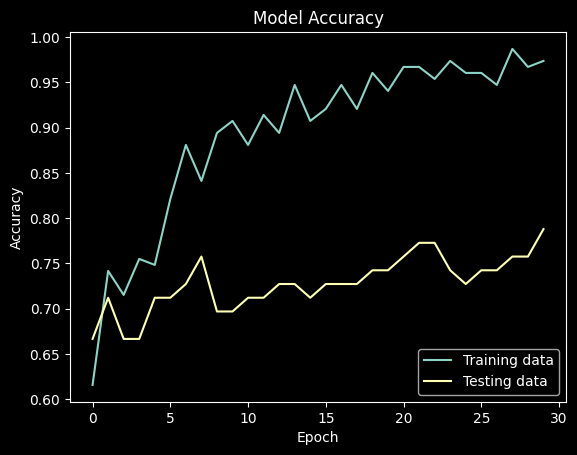

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 363ms/step
F1 Score (Validation): 0.7413


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import numpy as np



# Plotting Loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Test data'], loc='upper right')
plt.show()

# Plotting Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Testing data'], loc='lower right')
plt.show()

# Calculate and plot F1 Score

# Get the predictions (probabilities)
y_pred = model.predict(x_test)

# Convert probabilities to binary labels (argmax for categorical classification)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the F1 score on the validation set (for categorical classification)
# y_test should be one-hot encoded for categorical classification
y_test_classes = np.argmax(y_test, axis=1)  # Convert the one-hot encoded labels to class indices

# Calculate the F1 score
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')  # 'macro' averages the F1 score for all classes

# Print the F1 score
print(f"F1 Score (Validation): {f1:.4f}")




In [17]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

99.97% Confidence This Is Malignant 


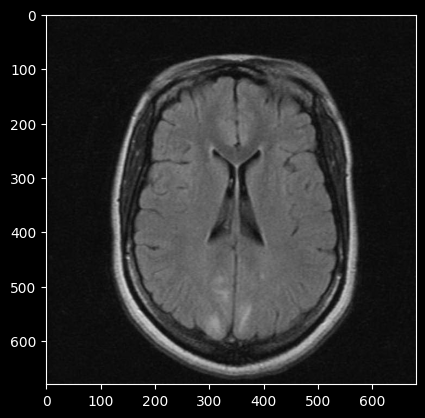

In [18]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow

# Load the image
img = Image.open(r"dataset\\no\\No19.jpg")

# Convert to RGB in case it's grayscale
img = img.convert("RGB")

# Resize the image and convert to a NumPy array
x = np.array(img.resize((128, 128)))

# Reshape to (1, 128, 128, 3) for the model input
x = x.reshape(1, 128, 128, 3)

# Perform prediction
res = model.predict_on_batch(x)

# Get the predicted class
classification = np.where(res == np.amax(res))[1][0]

# Display the image
imshow(img)

# Print the confidence and class
names = {0: "Benign", 1: "Malignant"}  # Define the class names
print(f"{res[0][classification] * 100:.2f}% Confidence This Is {names[classification]} ")


In [ ]:
model.save("model.h5")


In [21]:
model.save('my_model.keras')